In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
attendance = pd.read_csv('data/attendance.csv')
entity = pd.read_csv('data/entity_schedule.csv')
waiting_time = pd.read_csv('data/waiting_times.csv')
weather = pd.read_csv('data/weather_data.csv')

In [3]:
print(attendance.shape)
print(entity.shape)
print(waiting_time.shape)
print(weather.shape)

(2367, 3)
(38307, 7)
(3509324, 14)
(207264, 28)


In [4]:
# Only PortAventura World 
attendance = attendance[attendance['FACILITY_NAME'] == 'PortAventura World']
attendance.drop(['FACILITY_NAME'], inplace=True, axis=1)
attendance['USAGE_DATE'] = pd.to_datetime(attendance['USAGE_DATE'])
attendance['Year'] = attendance['USAGE_DATE'].dt.year
attendance['Month'] = attendance['USAGE_DATE'].dt.month
attendance

USAGE_DATE  attendance  Year  Month
0    2018-06-01       46804  2018      6
2    2018-06-02       57940  2018      6
4    2018-06-03       44365  2018      6
6    2018-06-04       37617  2018      6
8    2018-06-05       32438  2018      6
...         ...         ...   ...    ...
2357 2022-07-22       49586  2022      7
2359 2022-07-23       51748  2022      7
2361 2022-07-24       45261  2022      7
2363 2022-07-25       53764  2022      7
2365 2022-07-26       26391  2022      7

[1182 rows x 4 columns]

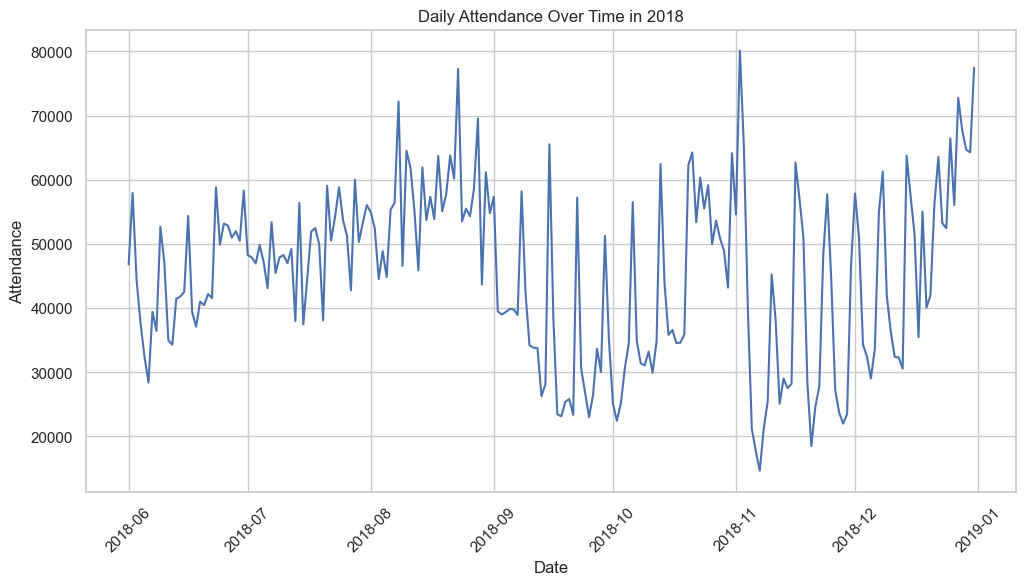

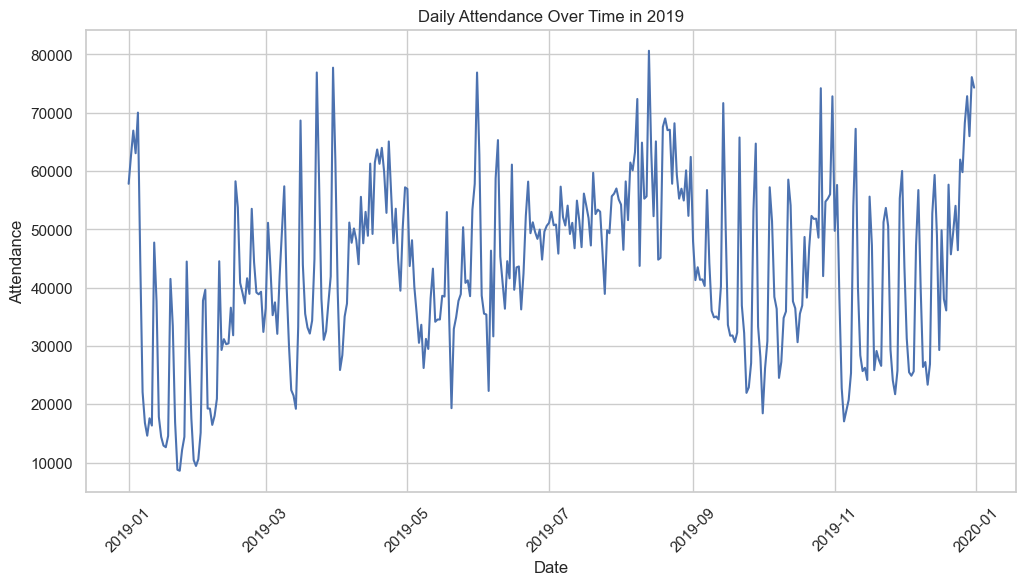

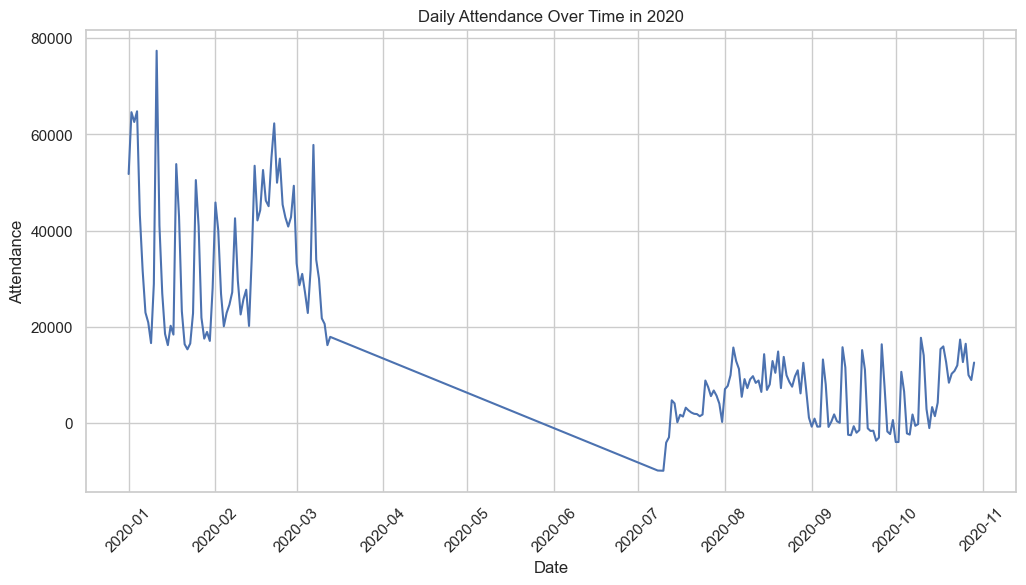

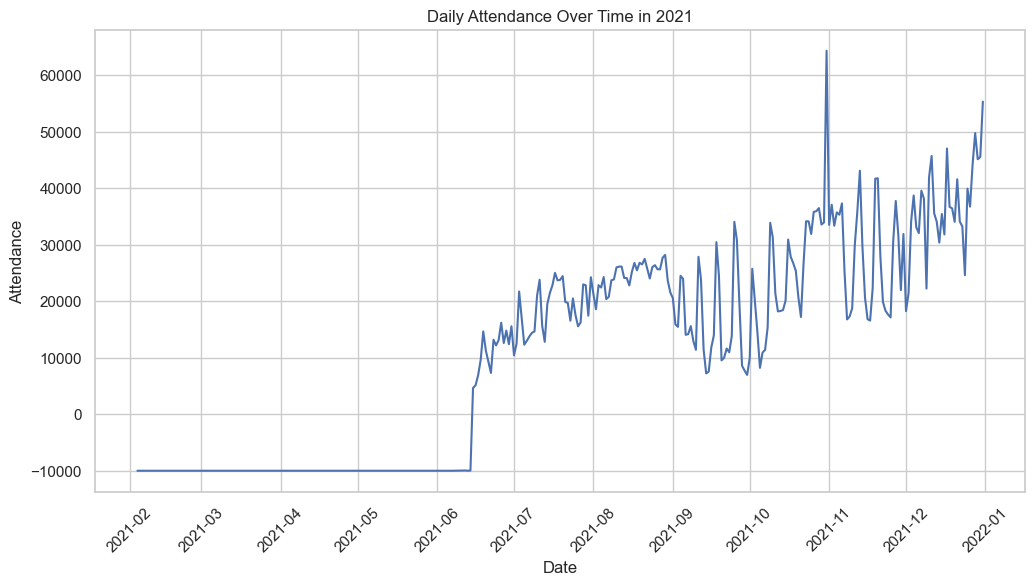

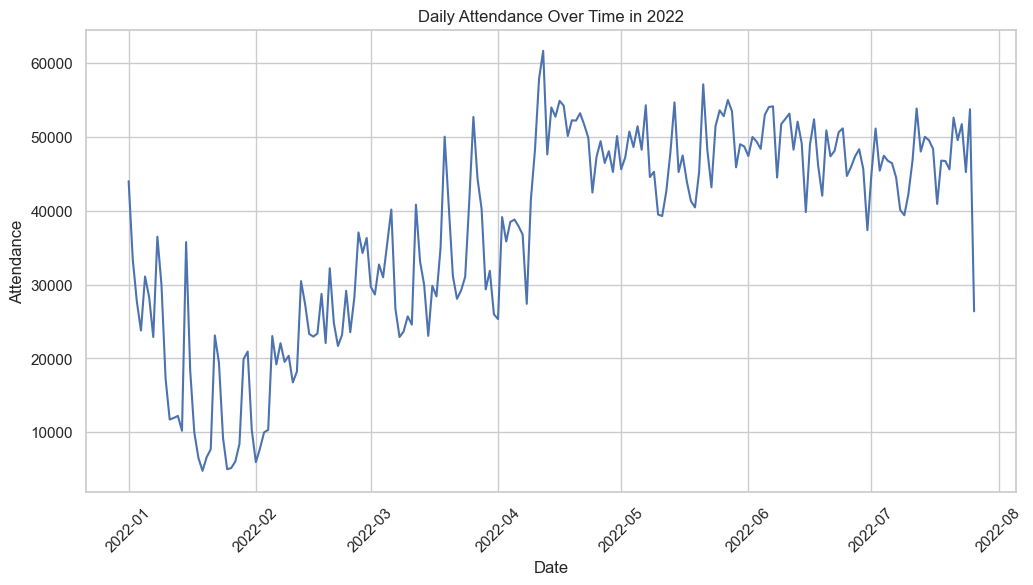

In [5]:
sns.set(style="whitegrid")
for year in attendance.Year.unique():
    atten_year = attendance[attendance.Year == year]
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='USAGE_DATE', y='attendance', data=atten_year, linestyle='-')
    plt.title('Daily Attendance Over Time in ' + str(year))
    plt.xlabel('Date')
    plt.ylabel('Attendance')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [6]:
mean_attendance_by_month = attendance.groupby(['Year', 'Month'])['attendance'].mean().reset_index()
mean_attendance_by_month['attendance'] = mean_attendance_by_month['attendance'].apply(np.ceil).astype(int)
mean_attendance_by_month['X'] = mean_attendance_by_month['Year'].astype(str) + '-' + mean_attendance_by_month['Month'].astype(str)
mean_attendance_by_month.head()

Year  Month  attendance        X
0  2018      6       44695   2018-6
1  2018      7       49475   2018-7
2  2018      8       56760   2018-8
3  2018      9       36330   2018-9
4  2018     10       43207  2018-10

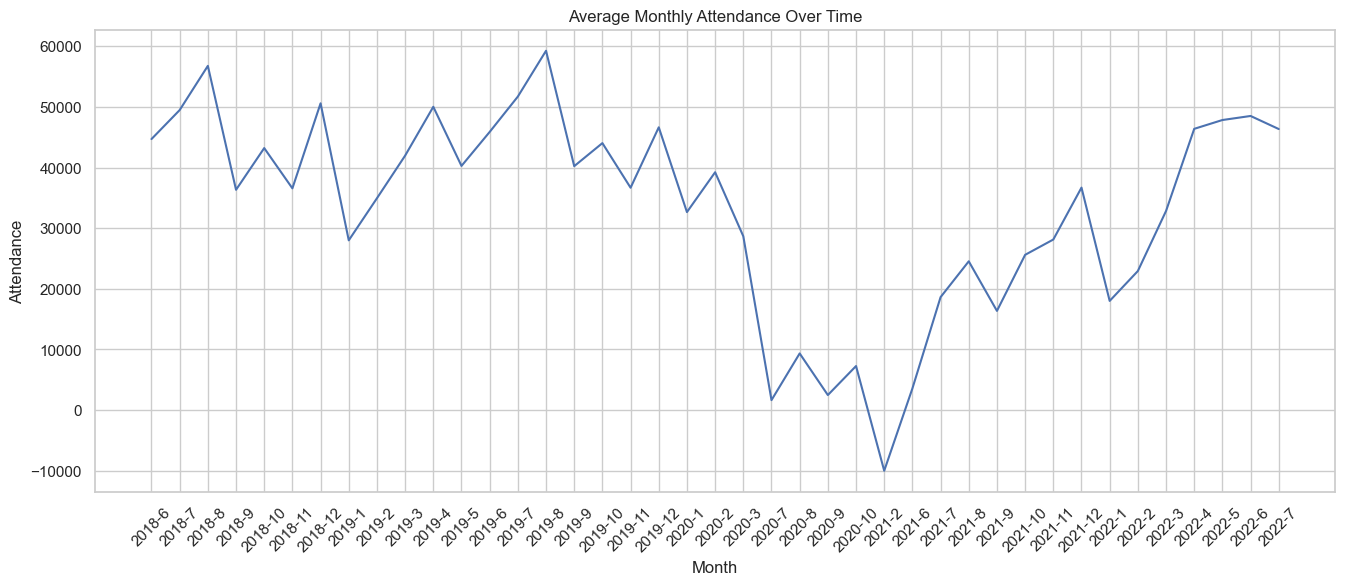

In [7]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='X', y='attendance', data=mean_attendance_by_month, linestyle='-')
plt.title('Average Monthly Attendance Over Time')
plt.xlabel('Month')
plt.ylabel('Attendance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [8]:
df_entity = pd.read_csv('data/entity_schedule.csv')
df_entity

REF_CLOSING_DESCRIPTION ENTITY_DESCRIPTION_SHORT ENTITY_TYPE  \
0                         NaN           Tivoli Gardens        PARK   
1                         NaN            Dizzy Dropper        ATTR   
2                         NaN               Sling Shot        ATTR   
3                         NaN                  Gondola        ATTR   
4                         NaN                 Monorail        ATTR   
...                       ...                      ...         ...   
38302                     NaN                Log Flume        ATTR   
38303         Fermeture Réhab             Giga Coaster        ATTR   
38304                     NaN         Inverted Coaster        ATTR   
38305                     NaN         Inverted Coaster        ATTR   
38306                     NaN                 Go-Karts        ATTR   

                      DEB_TIME                 FIN_TIME  \
0      2018-11-19 10:00:00.000  2018-11-19 18:00:00.000   
1      2022-04-07 08:30:00.000  2022-04-07 22:04:00.000   
2      2018-03-28 08:37:00.000  2018-03-28 18:12:00.000   
3      2019-04-11 09:55:00.000  2019-04-11 20:19:00.000   
4      2019-06-29 08:30:00.000  2019-06-29 20:35:00.000   
...                        ...                      ...   
38302  2022-08-20 08:25:00.000  2022-08-20 23:09:00.000   
38303  2022-08-20 23:59:00.000  2022-08-20 23:59:00.000   
38304  2022-08-20 09:30:00.000  2022-08-20 17:48:00.000   
38305  2022-08-22 09:20:00.000  2022-08-22 17:54:00.000   
38306  2022-08-22 08:30:00.000  2022-08-22 23:05:00.000   

                   UPDATE_TIME   WORK_DATE  
0      2018-11-20 08:24:32.000  2018-11-19  
1      2022-04-08 08:00:30.000  2022-04-07  
2      2018-03-29 08:24:37.000  2018-03-28  
3      2019-04-12 08:59:29.000  2019-04-11  
4      2019-06-30 08:14:16.000  2019-06-29  
...                        ...         ...  
38302  2022-08-21 09:16:50.000  2022-08-20  
38303  2022-08-21 09:16:53.000  2022-08-20  
38304  2022-08-21 09:16:55.000  2022-08-20  
38305  2022-08-23 09:02:42.000  2022-08-22  
38306  2022-08-23 09:02:36.000  2022-08-22  

[38307 rows x 7 columns]

In [9]:
df_entity['ENTITY_DESCRIPTION_SHORT'].unique()

array(['Tivoli Gardens', 'Dizzy Dropper', 'Sling Shot', 'Gondola',
       'Monorail', 'Top Spin', 'PortAventura World', 'Skyway',
       'Kiddie Coaster', 'Oz Theatre', 'Free Fall', 'Giga Coaster',
       'Inverted Coaster', 'Himalaya Ride', 'Water Ride',
       'Spinning Coaster', 'Aeroplane Ride', 'Swing Ride', 'Log Flume',
       'Bungee Jump', 'Rapids Ride', 'Scooby Doo', 'Crazy Bus',
       'Spiral Slide', 'Superman Ride', 'Reverse Bungee', 'Power Tower',
       'Drop Tower', 'Merry Go Round', 'Bumper Cars', 'Giant Wheel',
       'Flying Coaster', 'Roller Coaster', 'Go-Karts', 'Haunted House',
       'Zipline', 'Pirate Ship', 'Crazy Dance', 'Circus Train',
       'Vertical Drop', 'Tilt-A-Whirl'], dtype=object)

In [10]:
# Assuming normal operation
entity = df_entity.copy()
entity = entity[entity['REF_CLOSING_DESCRIPTION'].isnull()]
entity.drop(columns=['REF_CLOSING_DESCRIPTION'], inplace=True)
entity['datetime_deb'] = pd.to_datetime(entity['DEB_TIME'])
entity['datetime_fin'] = pd.to_datetime(entity['FIN_TIME'])
entity['Year'] = entity['datetime_deb'].dt.year
entity['Month'] = entity['datetime_deb'].dt.month
entity['Day_deb'] = entity['datetime_deb'].dt.day
entity['Hour_deb'] = entity['datetime_deb'].dt.hour
entity['Minute_deb'] = entity['datetime_deb'].dt.minute
entity['Day_fin'] = entity['datetime_fin'].dt.day
entity['Hour_fin'] = entity['datetime_fin'].dt.hour
entity['Minute_fin'] = entity['datetime_fin'].dt.minute
entity['duration'] = entity['datetime_fin'] - entity['datetime_deb']
entity['duration_hour'] = np.ceil(entity['duration'].dt.total_seconds() / 3600 * 100) / 100
entity.drop(columns=['UPDATE_TIME', 'DEB_TIME', 'FIN_TIME', 'datetime_deb', 'datetime_fin', 'duration'], inplace=True)
entity

ENTITY_DESCRIPTION_SHORT ENTITY_TYPE   WORK_DATE  Year  Month  Day_deb  \
0               Tivoli Gardens        PARK  2018-11-19  2018     11       19   
1                Dizzy Dropper        ATTR  2022-04-07  2022      4        7   
2                   Sling Shot        ATTR  2018-03-28  2018      3       28   
3                      Gondola        ATTR  2019-04-11  2019      4       11   
4                     Monorail        ATTR  2019-06-29  2019      6       29   
...                        ...         ...         ...   ...    ...      ...   
38300           Flying Coaster        ATTR  2022-08-19  2022      8       19   
38302                Log Flume        ATTR  2022-08-20  2022      8       20   
38304         Inverted Coaster        ATTR  2022-08-20  2022      8       20   
38305         Inverted Coaster        ATTR  2022-08-22  2022      8       22   
38306                 Go-Karts        ATTR  2022-08-22  2022      8       22   

       Hour_deb  Minute_deb  Day_fin  Hour_fin  Minute_fin  duration_hour  
0            10           0       19        18           0           8.00  
1             8          30        7        22           4          13.57  
2             8          37       28        18          12           9.59  
3             9          55       11        20          19          10.40  
4             8          30       29        20          35          12.09  
...         ...         ...      ...       ...         ...            ...  
38300         9          30       19        23           9          13.65  
38302         8          25       20        23           9          14.74  
38304         9          30       20        17          48           8.31  
38305         9          20       22        17          54           8.57  
38306         8          30       22        23           5          14.59  

[33835 rows x 12 columns]

In [11]:
# For PortAventura World Only
# On park entity
park = entity.copy()
park = park[park['ENTITY_DESCRIPTION_SHORT'] == 'PortAventura World']
park.drop(columns=['ENTITY_DESCRIPTION_SHORT', 'ENTITY_TYPE', 'WORK_DATE'], inplace=True)
park

Year  Month  Day_deb  Hour_deb  Minute_deb  Day_fin  Hour_fin  \
6      2018      7       17         8          30       17         9   
11     2019      2       28         8          30       28         9   
13     2019      8       18         8          30       18         9   
15     2020      2        5        10           0        5        19   
36     2019      2       16         8          30       16         9   
...     ...    ...      ...       ...         ...      ...       ...   
38211  2022      8       19         8          30       19         9   
38223  2022      8       17         9          30       17        23   
38241  2022      8       17         8          30       17         9   
38265  2022      8       18         9          30       18        23   
38287  2022      8       18         8          30       18         9   

       Minute_fin  duration_hour  
6              30            1.0  
11             30            1.0  
13             30            1.0  
15              0            9.0  
36             30            1.0  
...           ...            ...  
38211          30            1.0  
38223           0           13.5  
38241          30            1.0  
38265           0           13.5  
38287          30            1.0  

[1864 rows x 9 columns]

In [12]:
month_park = park.copy()
month_park['deb_time'] = month_park['Hour_deb'] + month_park['Minute_deb'] / 60
month_park['fin_time'] = month_park['Hour_fin'] + month_park['Minute_fin'] / 60
month_park.drop(columns=['Day_deb', 'Day_fin', 'Hour_deb', 'Minute_deb', 'Hour_fin', 'Minute_fin'], inplace=True)
month_park = month_park.groupby(by=['Year', 'Month']).mean().reset_index()
month_park['duration_hour'] = month_park['duration_hour'].round(2)
month_park['deb_time'] = month_park['deb_time'].round(0)
month_park['fin_time'] = month_park['fin_time'].round(0)

In [13]:
month_park

Year  Month  duration_hour  deb_time  fin_time
0   2018      1           5.56       9.0      15.0
1   2018      2           5.62       9.0      15.0
2   2018      3           5.85       9.0      15.0
3   2018      4           6.50       9.0      16.0
4   2018      5           6.82       9.0      16.0
5   2018      6           7.00       9.0      16.0
6   2018      7           7.00       9.0      16.0
7   2018      8           7.00       9.0      16.0
8   2018      9           6.01       9.0      15.0
9   2018     10           5.94       9.0      15.0
10  2018     11           5.50       9.0      15.0
11  2018     12           6.01       9.0      15.0
12  2019      1           5.20       9.0      14.0
13  2019      2           5.09       9.0      14.0
14  2019      3           5.44       9.0      15.0
15  2019      4           6.50       9.0      16.0
16  2019      5           6.84       9.0      16.0
17  2019      6           7.00       9.0      16.0
18  2019      7           7.00       9.0      16.0
19  2019      8           7.00       9.0      16.0
20  2019      9           5.99       9.0      15.0
21  2019     10           5.92       9.0      15.0
22  2019     11           5.43       9.0      15.0
23  2019     12           5.88       9.0      15.0
24  2020      1           5.14       9.0      14.0
25  2020      2           5.36       9.0      15.0
26  2022      4           7.22       9.0      16.0
27  2022      5           7.25       9.0      16.0
28  2022      6           7.25       9.0      16.0
29  2022      7           7.25       9.0      16.0
30  2022      8           7.25       9.0      16.0

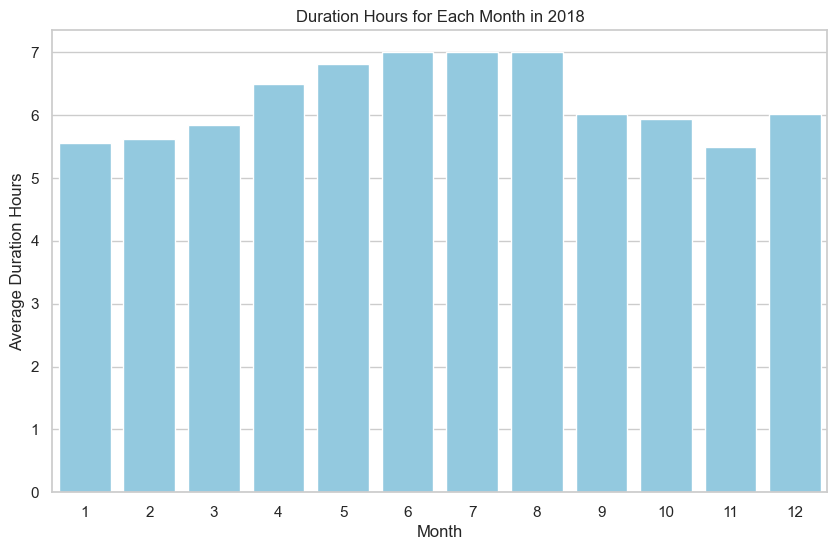

In [14]:
# plot the duration hours for each month in each year 
# Year 2018 as example
temp_data = month_park[month_park['Year'] == 2018]

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='duration_hour', data=temp_data, color='skyblue')
plt.title(f'Duration Hours for Each Month in 2018')
plt.xlabel('Month')
plt.ylabel('Average Duration Hours')
plt.show()
    

In [15]:
attr_link = pd.read_csv('data/link_attraction_park.csv', sep=';')
attr_PA = attr_link[attr_link['PARK'] == 'PortAventura World']['ATTRACTION']
attr_PA

1          Bumper Cars
2          Bungee Jump
3         Circus Train
5          Crazy Dance
6        Dizzy Dropper
7           Drop Tower
8       Flying Coaster
9            Free Fall
10         Giant Wheel
11        Giga Coaster
12            Go-Karts
14       Haunted House
15       Himalaya Ride
16    Inverted Coaster
17      Kiddie Coaster
19      Merry Go Round
21          Oz Theatre
24         Rapids Ride
26      Roller Coaster
30    Spinning Coaster
31        Spiral Slide
32       Superman Ride
33          Swing Ride
36       Vertical Drop
37          Water Ride
38             Zipline
Name: ATTRACTION, dtype: object

In [16]:
# For PortAventura World Only
# On attr entity
attr = entity.copy()
attr = attr[attr['ENTITY_DESCRIPTION_SHORT'].isin(attr_PA)]
attr.drop(columns=['ENTITY_TYPE', 'WORK_DATE'], inplace=True)
attr

ENTITY_DESCRIPTION_SHORT  Year  Month  Day_deb  Hour_deb  Minute_deb  \
1                Dizzy Dropper  2022      4        7         8          30   
16                   Free Fall  2020      1        4         8          11   
19                Giga Coaster  2019      4        8         9          25   
21            Inverted Coaster  2018      9       15         9          55   
22               Himalaya Ride  2018      6        5        10           0   
...                        ...   ...    ...      ...       ...         ...   
38299             Spiral Slide  2022      8       17        10           0   
38300           Flying Coaster  2022      8       19         9          30   
38304         Inverted Coaster  2022      8       20         9          30   
38305         Inverted Coaster  2022      8       22         9          20   
38306                 Go-Karts  2022      8       22         8          30   

       Day_fin  Hour_fin  Minute_fin  duration_hour  
1            7        22           4          13.57  
16           4        18          15          10.07  
19           8        21           0          11.59  
21          15        18          20           8.42  
22           5        23           0          13.00  
...        ...       ...         ...            ...  
38299       17        18           7           8.12  
38300       19        23           9          13.65  
38304       20        17          48           8.31  
38305       22        17          54           8.57  
38306       22        23           5          14.59  

[20582 rows x 10 columns]

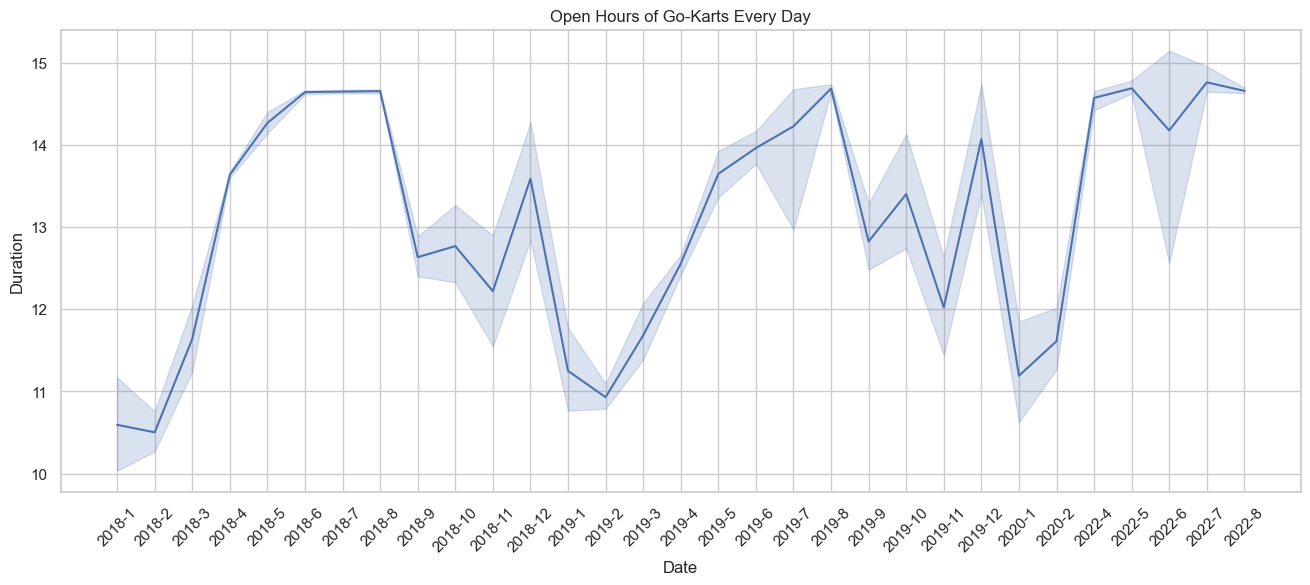

In [17]:
# Take Go-Karts as an example
gk = attr[attr['ENTITY_DESCRIPTION_SHORT'] == 'Go-Karts']
gk = gk.sort_values(by = ['Year', 'Month'])
gk['X'] = gk['Year'].astype(str) + '-' + gk['Month'].astype(str)

plt.figure(figsize=(16, 6))
sns.lineplot(x='X', y='duration_hour', data=gk, linestyle='-')
plt.title('Open Hours of Go-Karts Every Day')
plt.xlabel('Date')
plt.ylabel('Duration')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

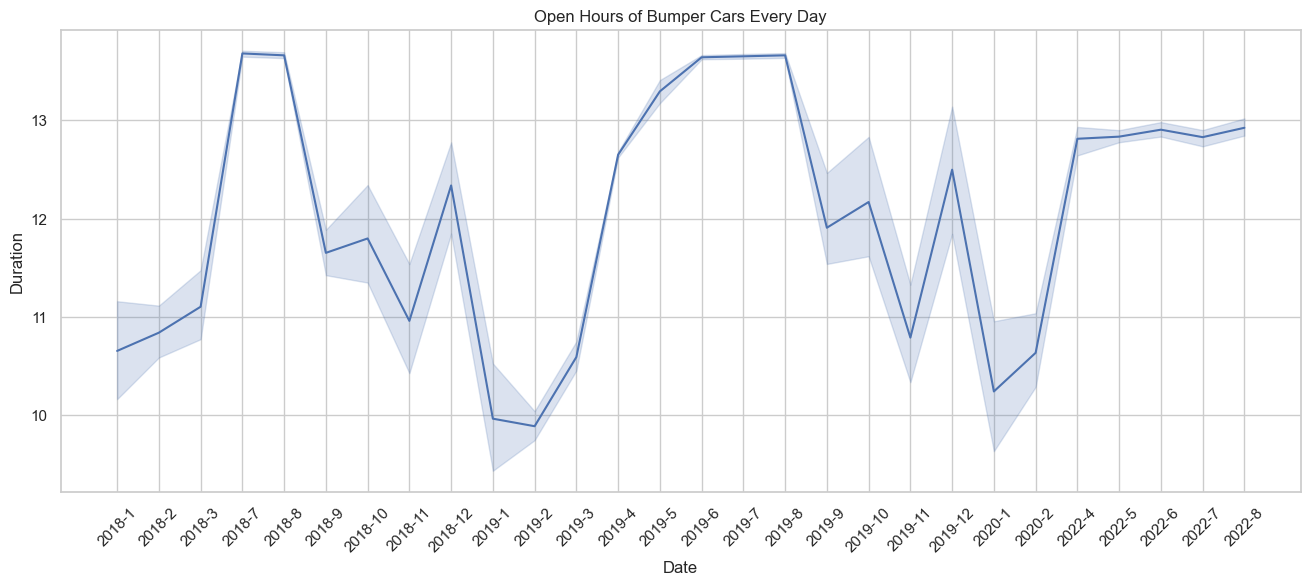

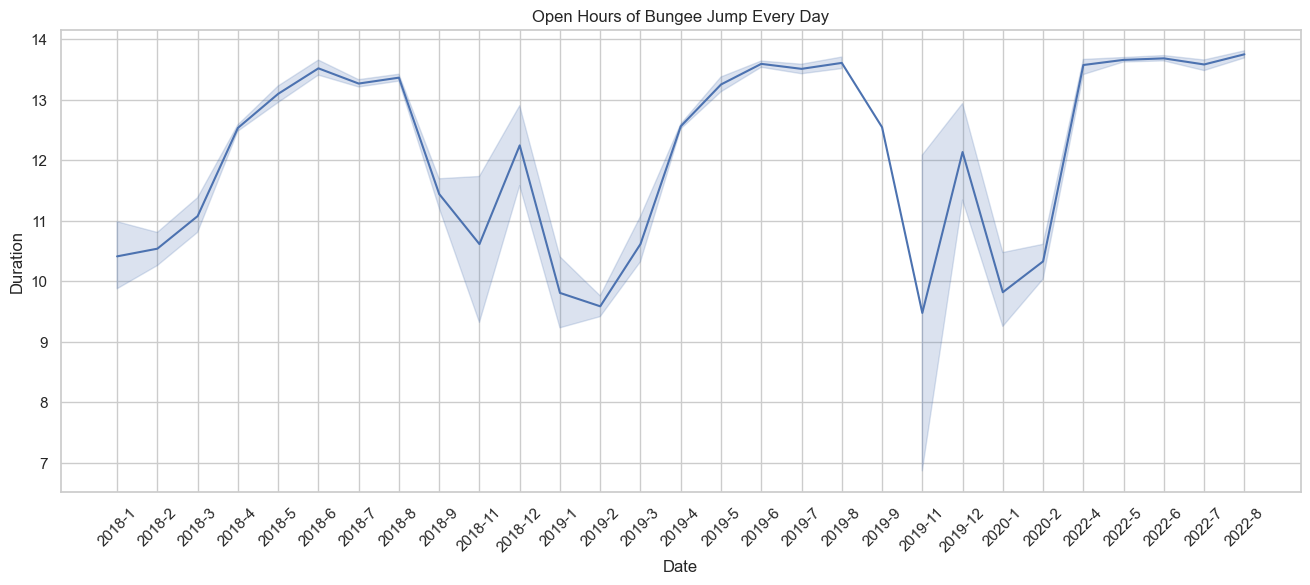

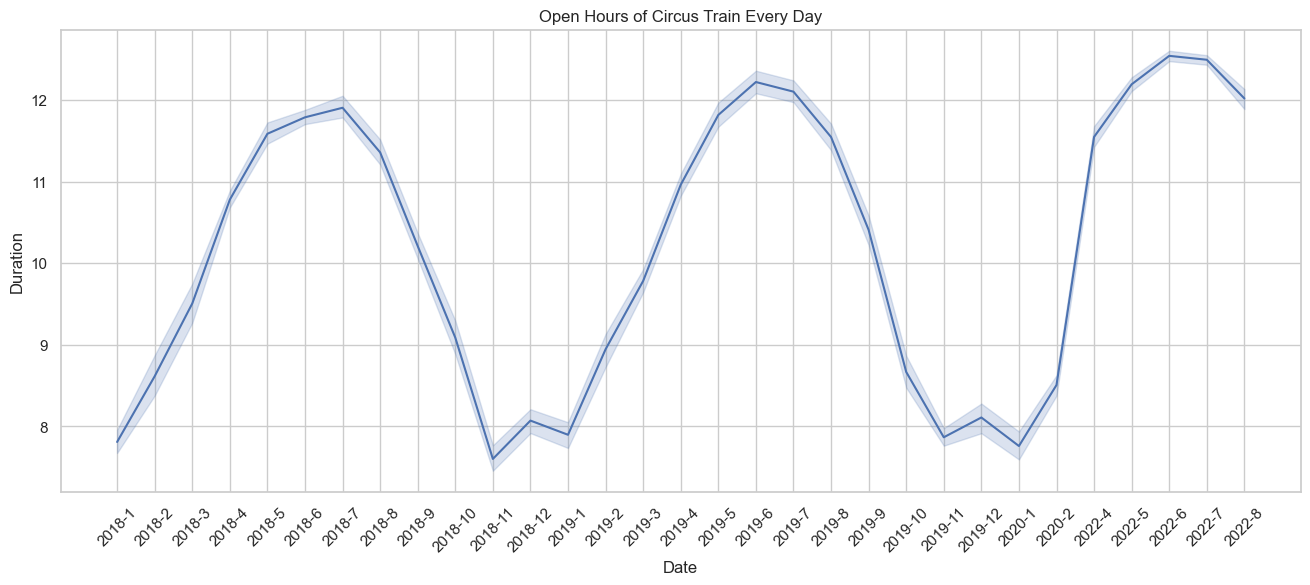

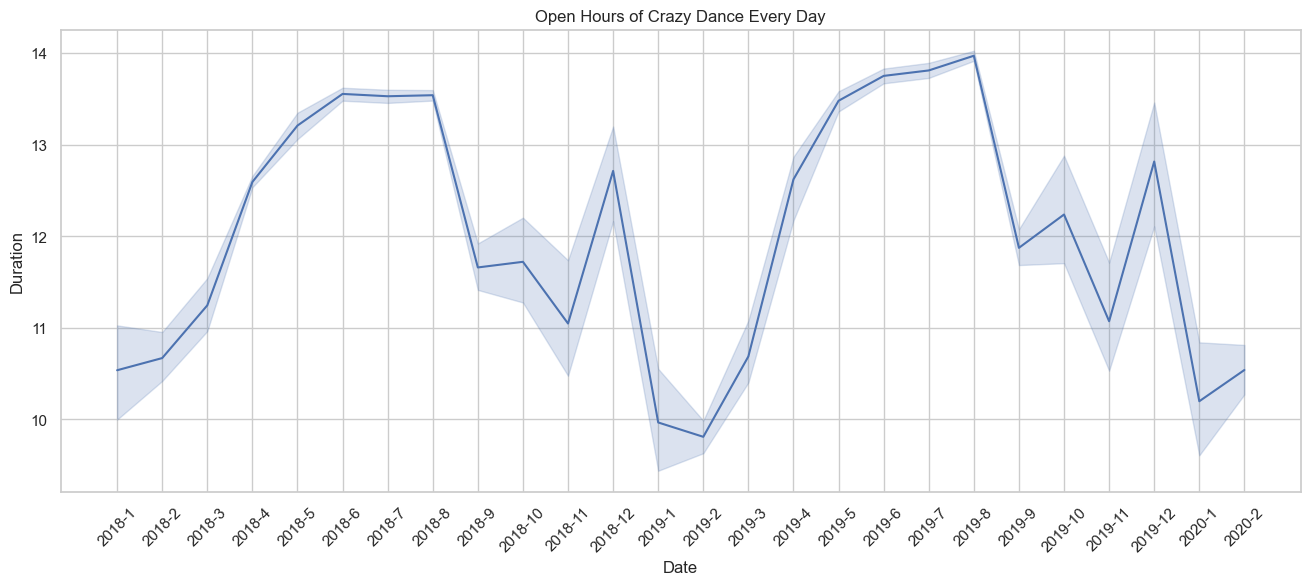

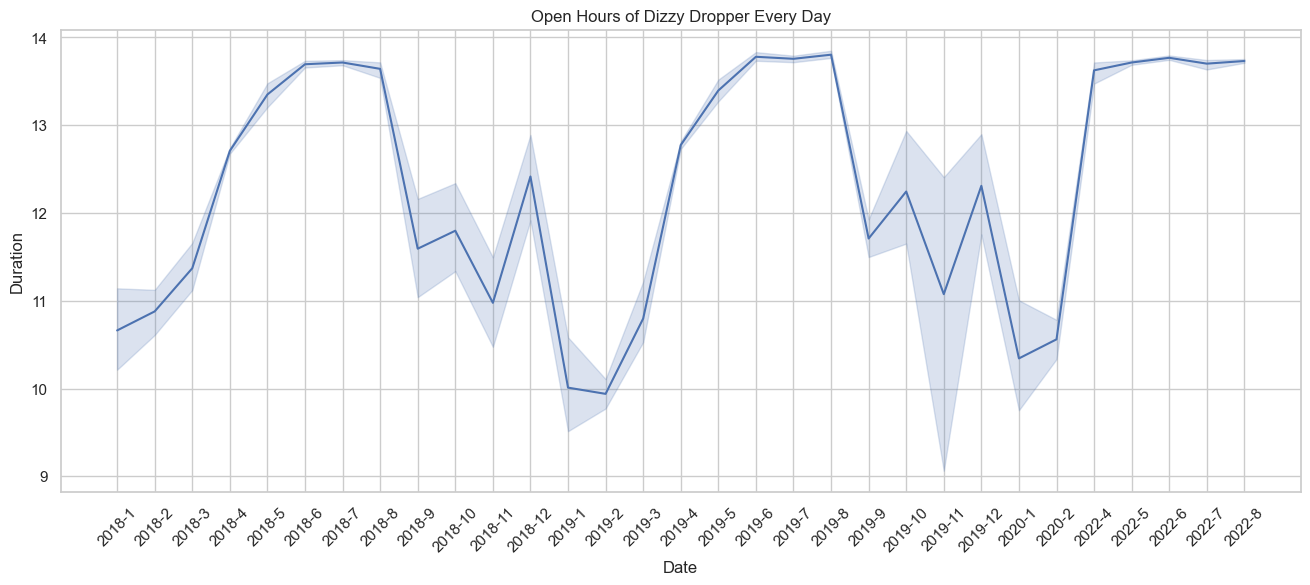

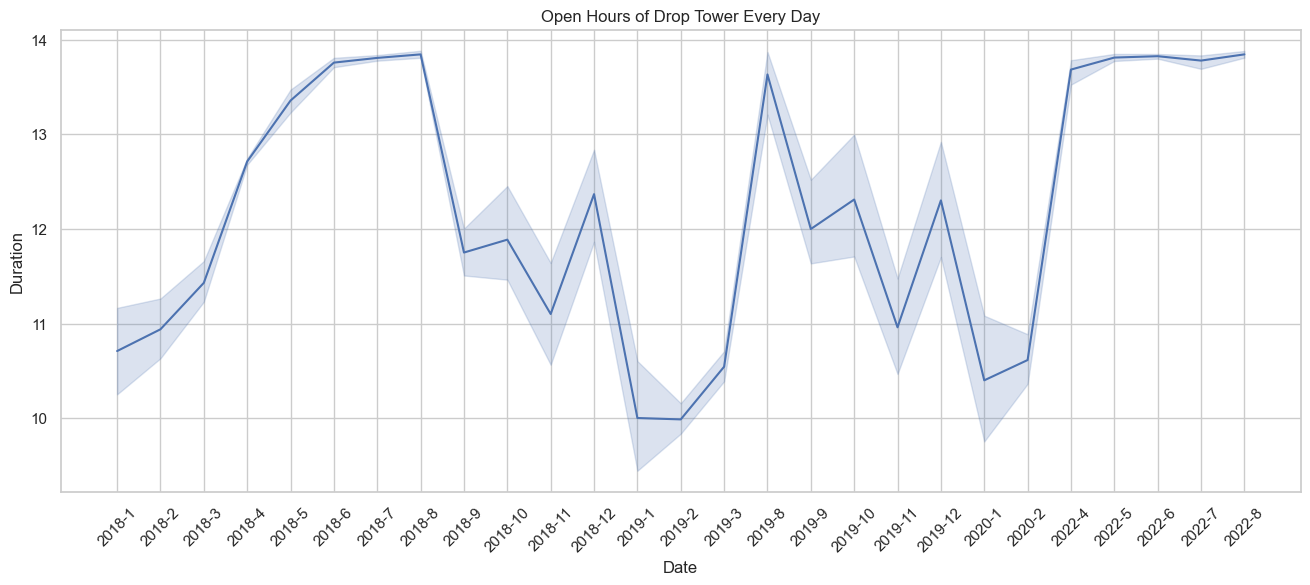

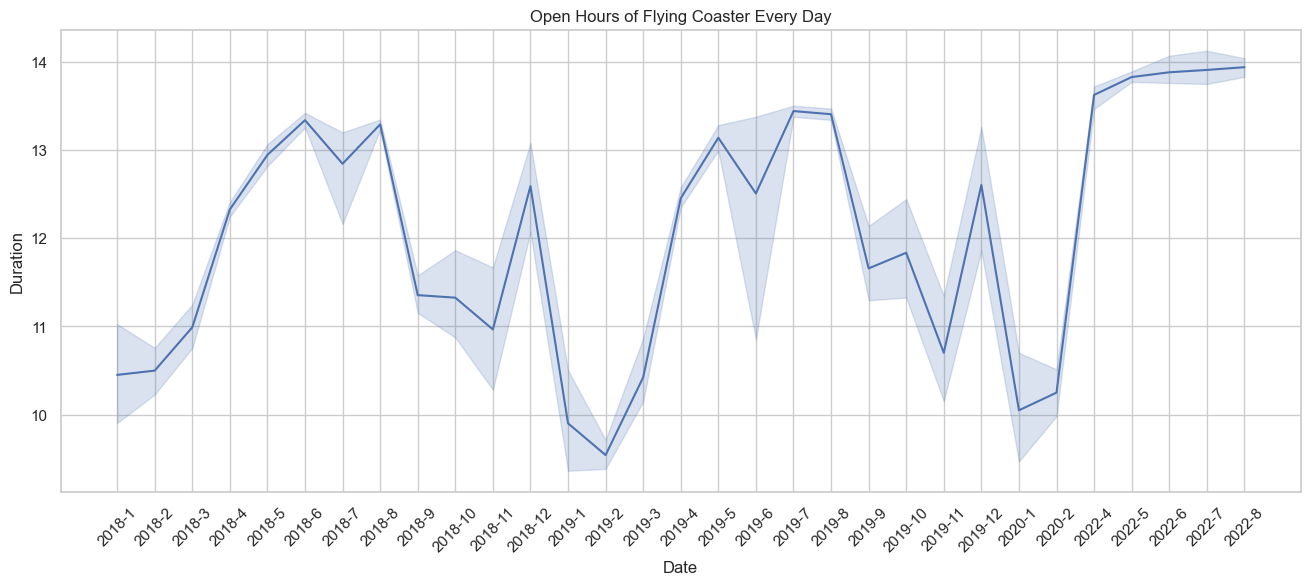

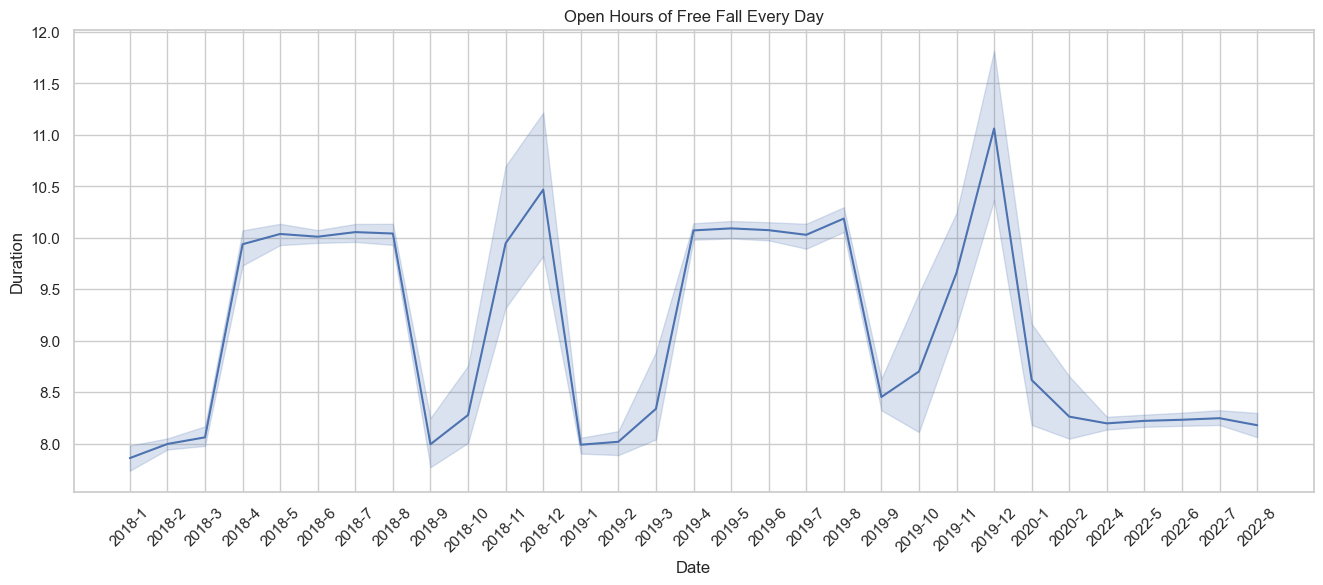

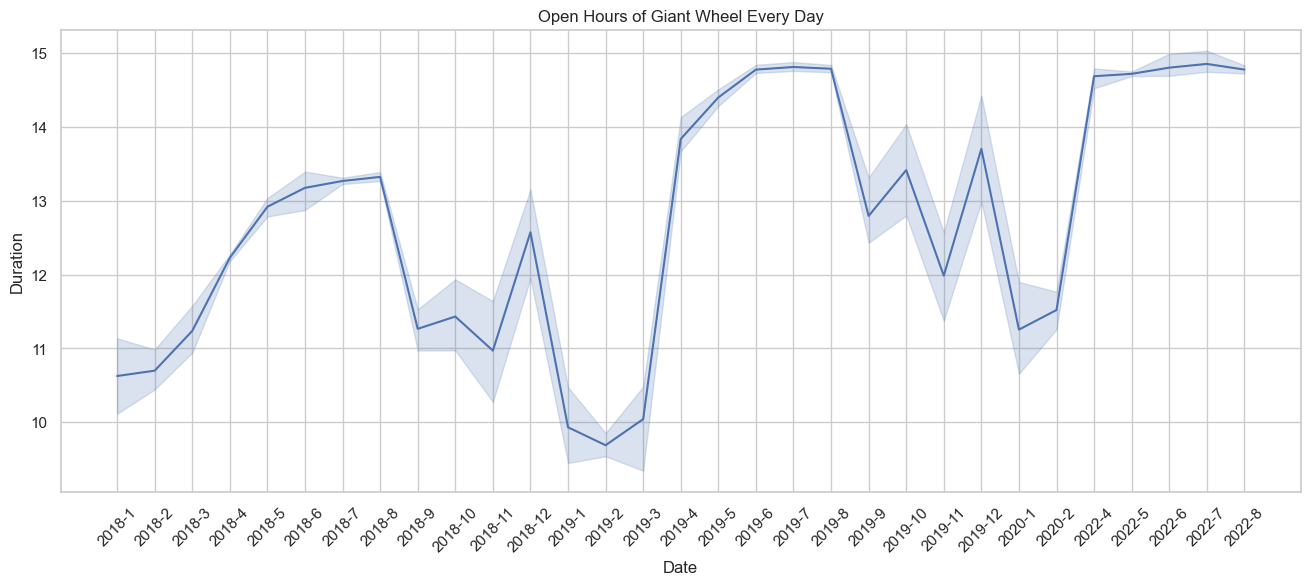

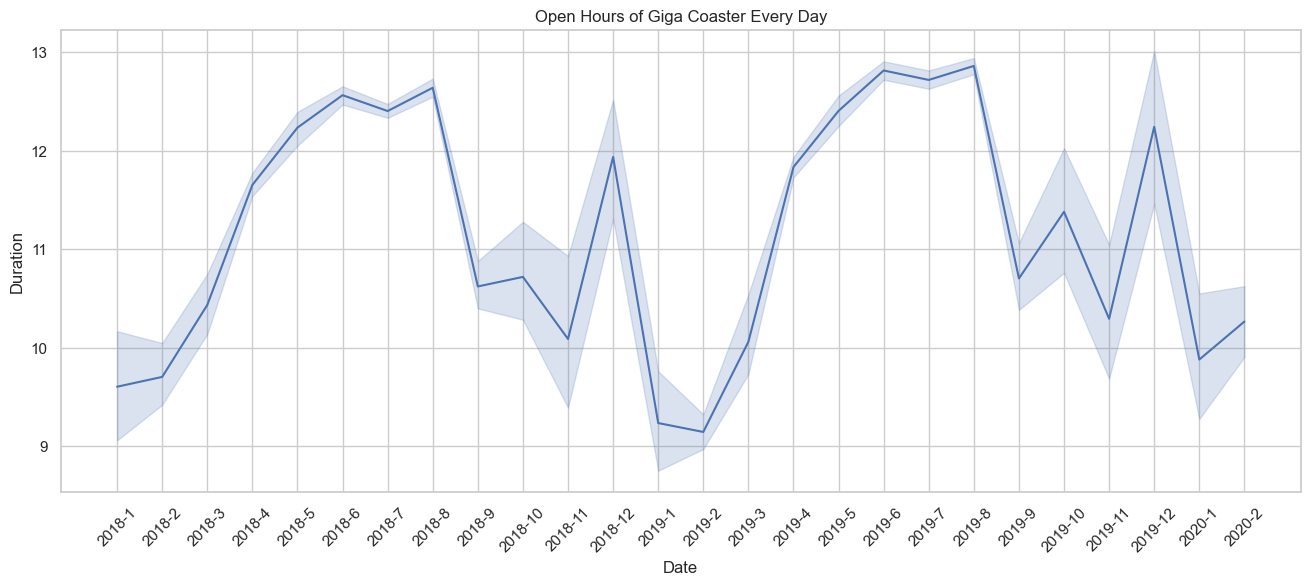

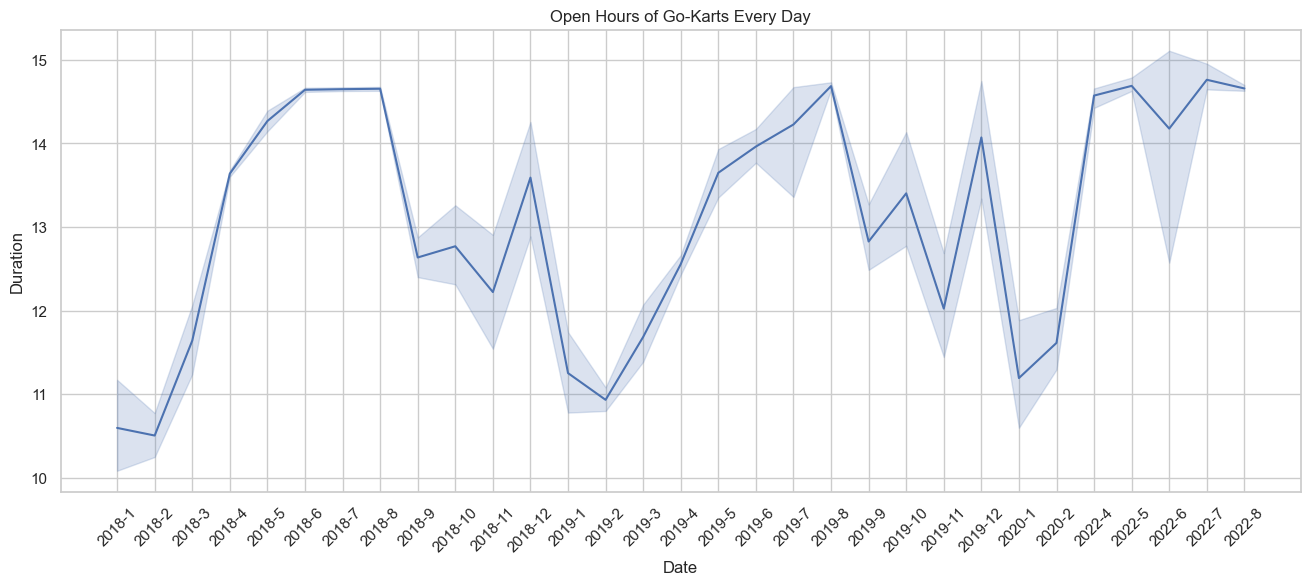

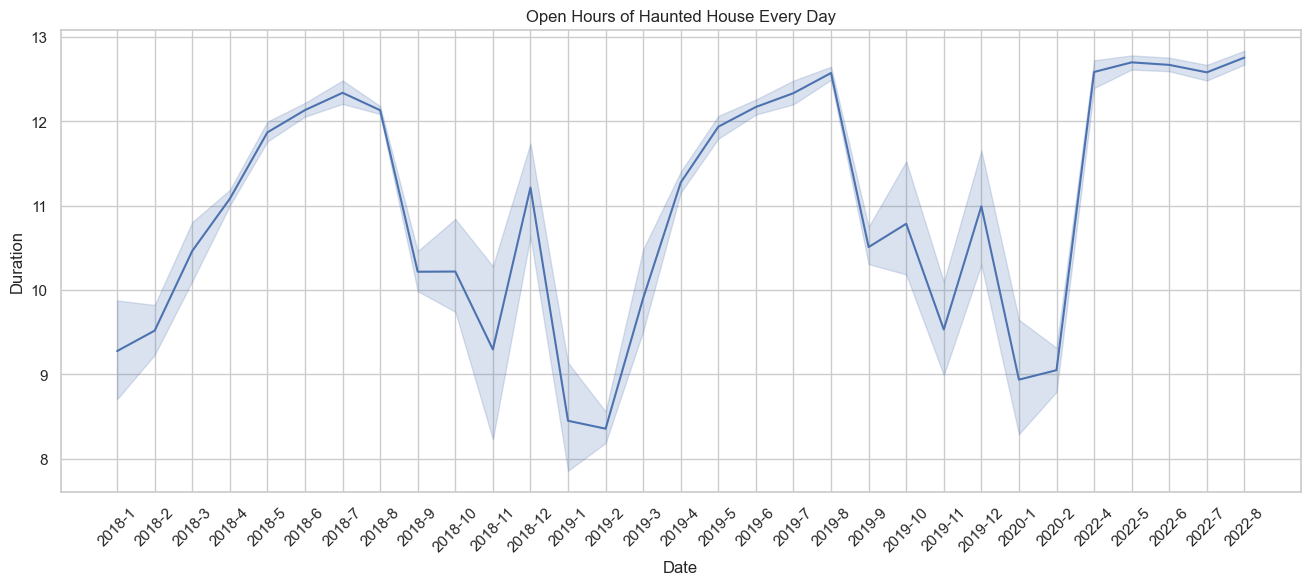

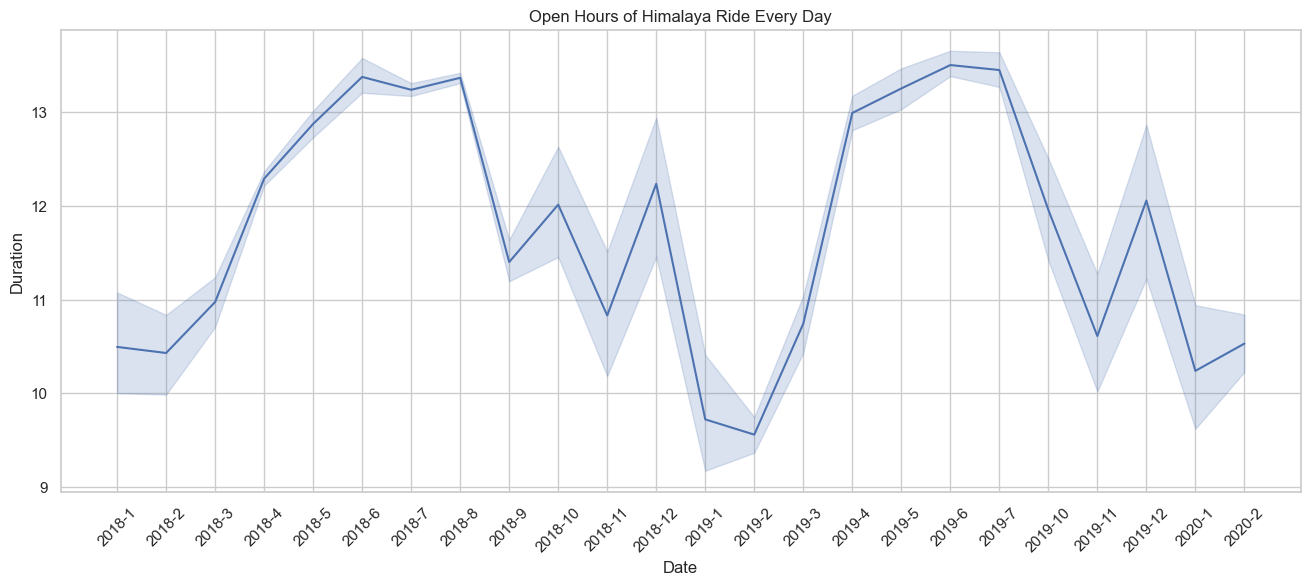

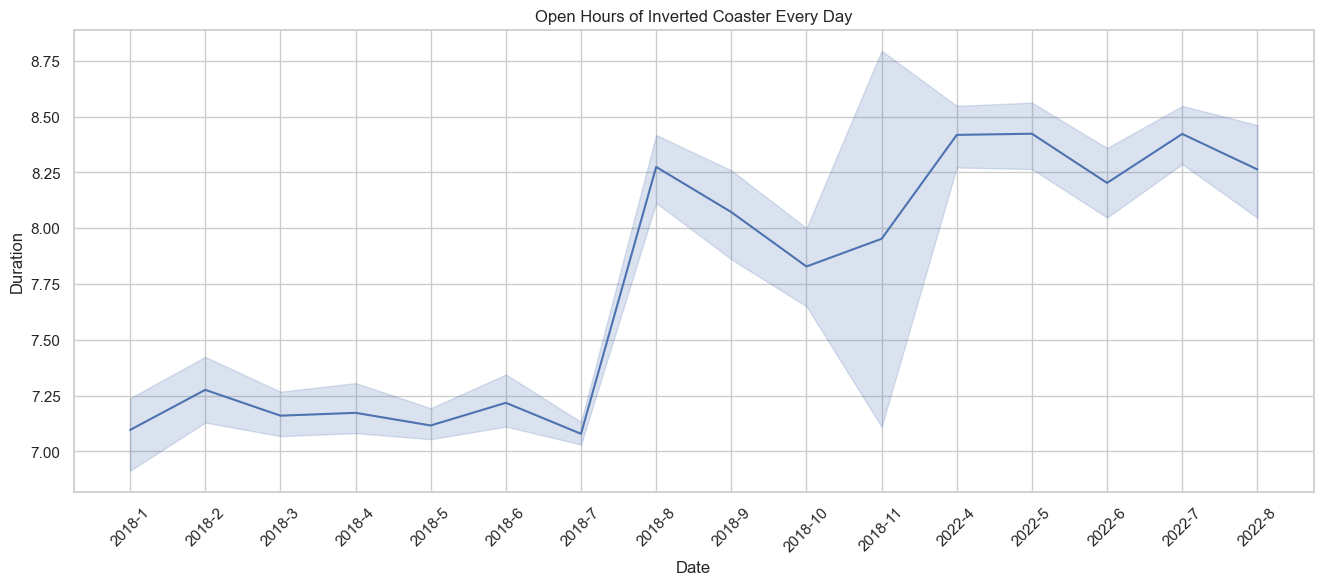

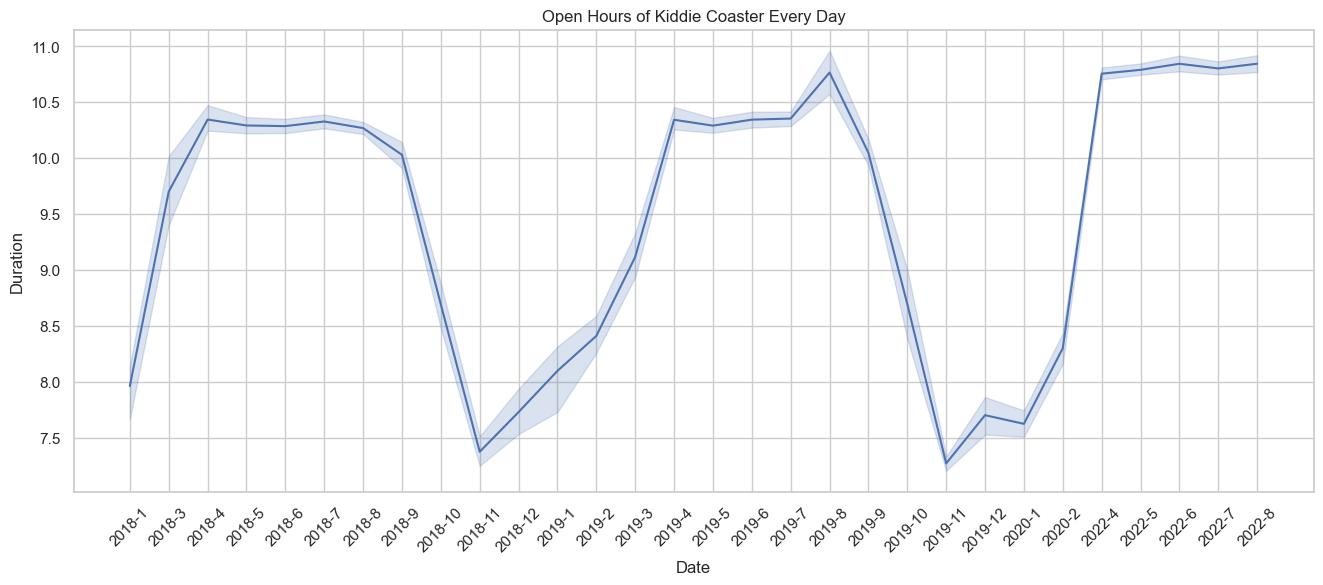

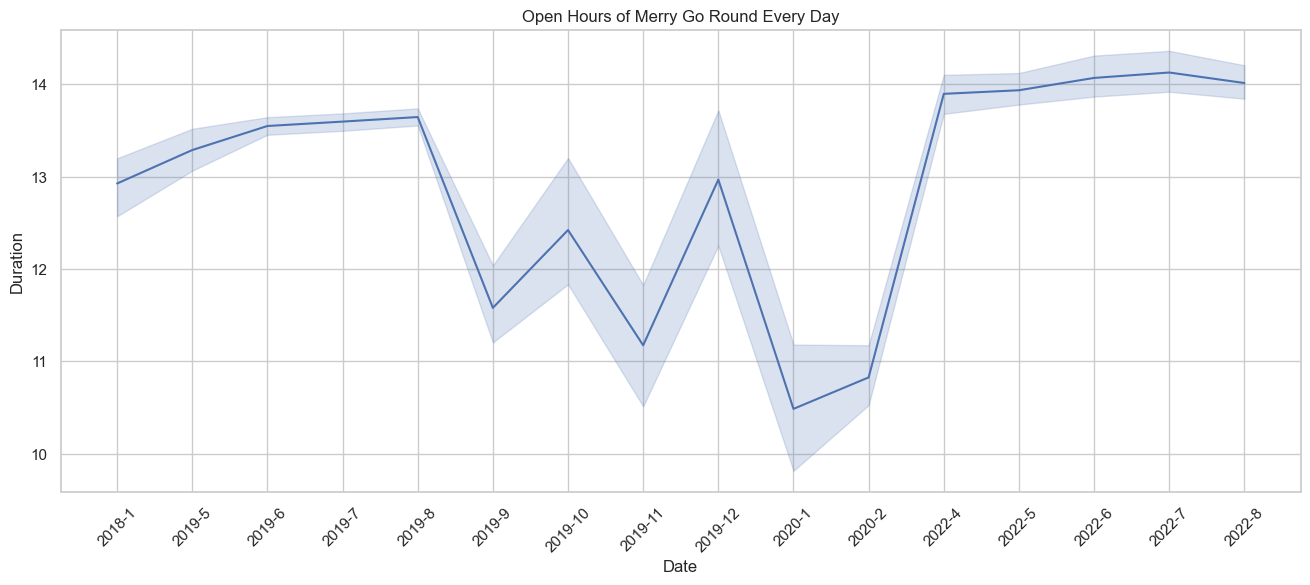

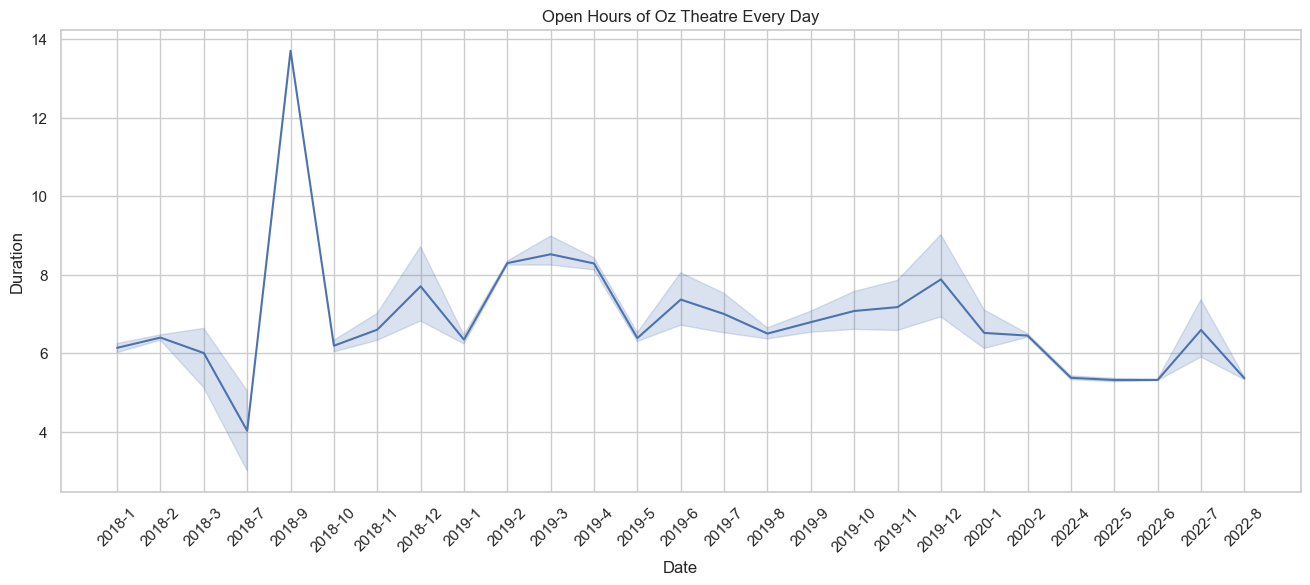

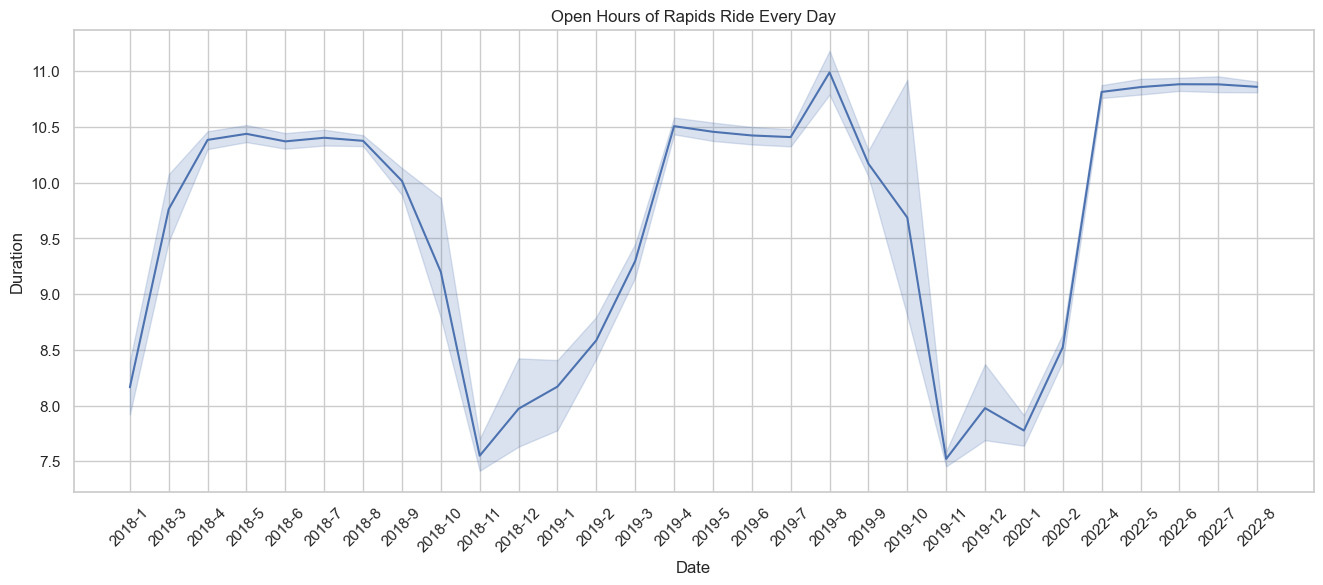

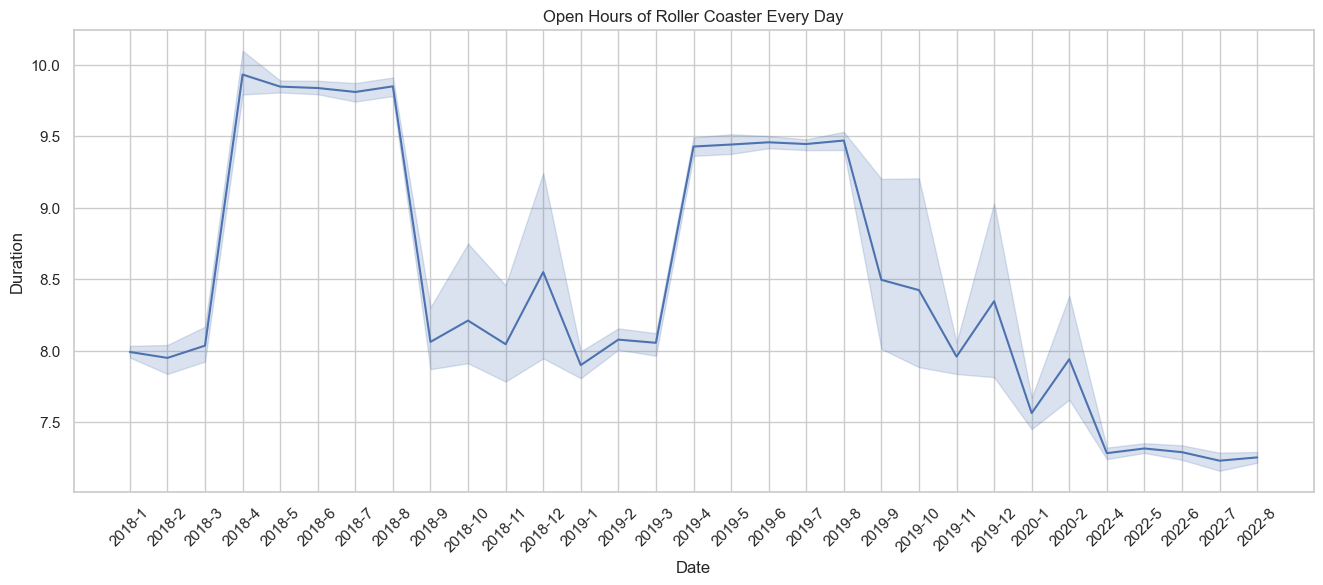

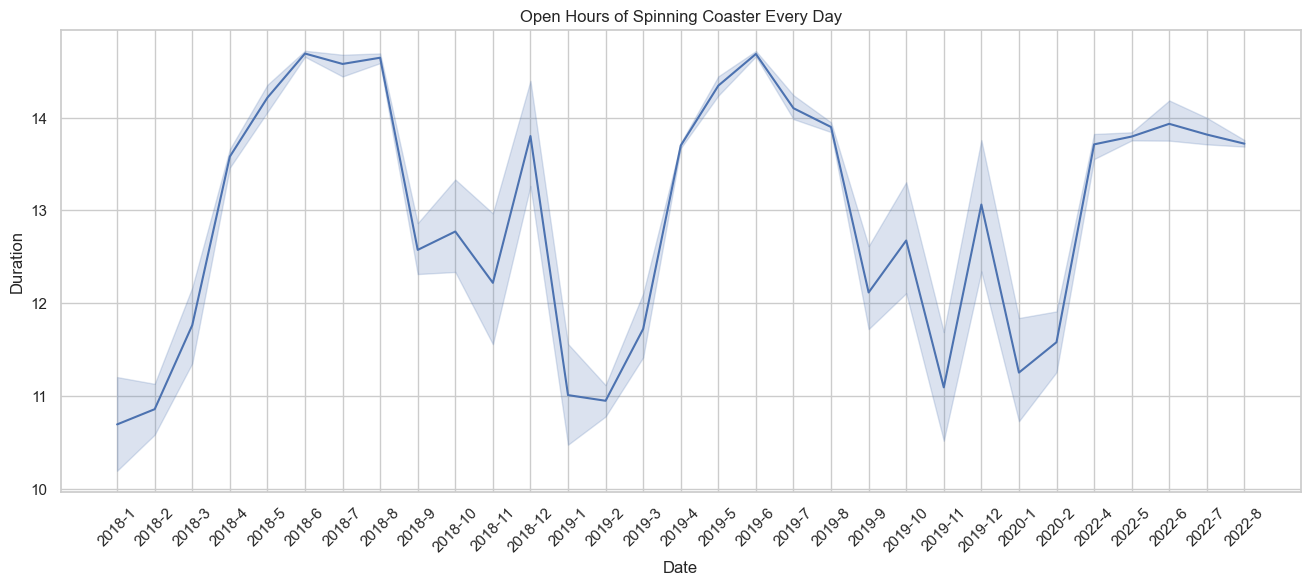

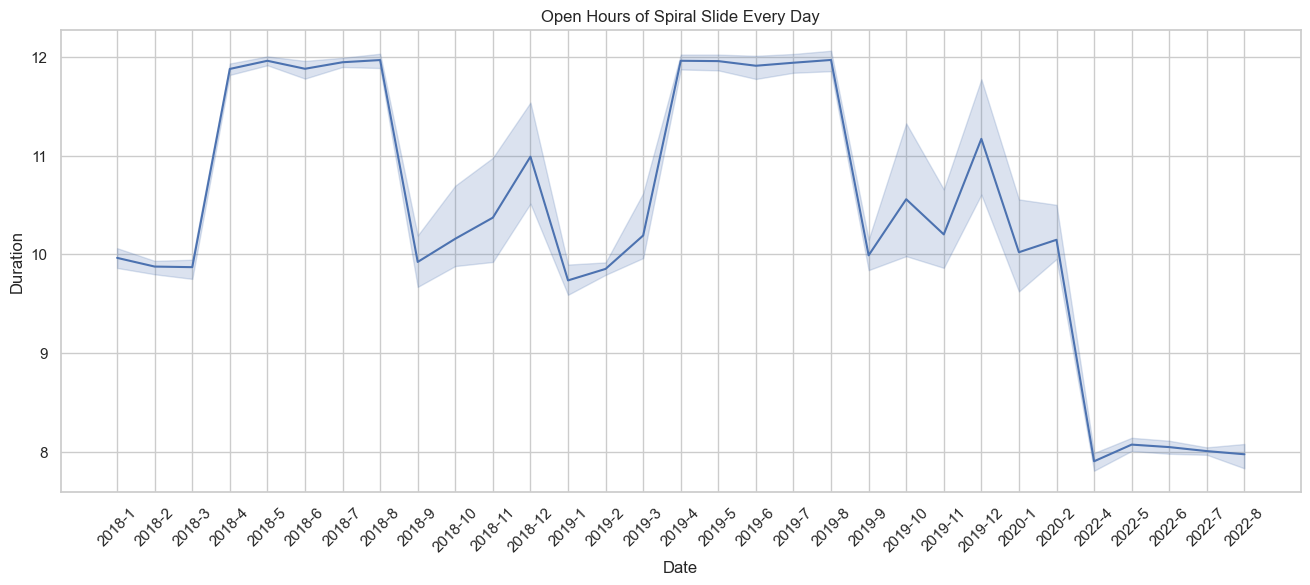

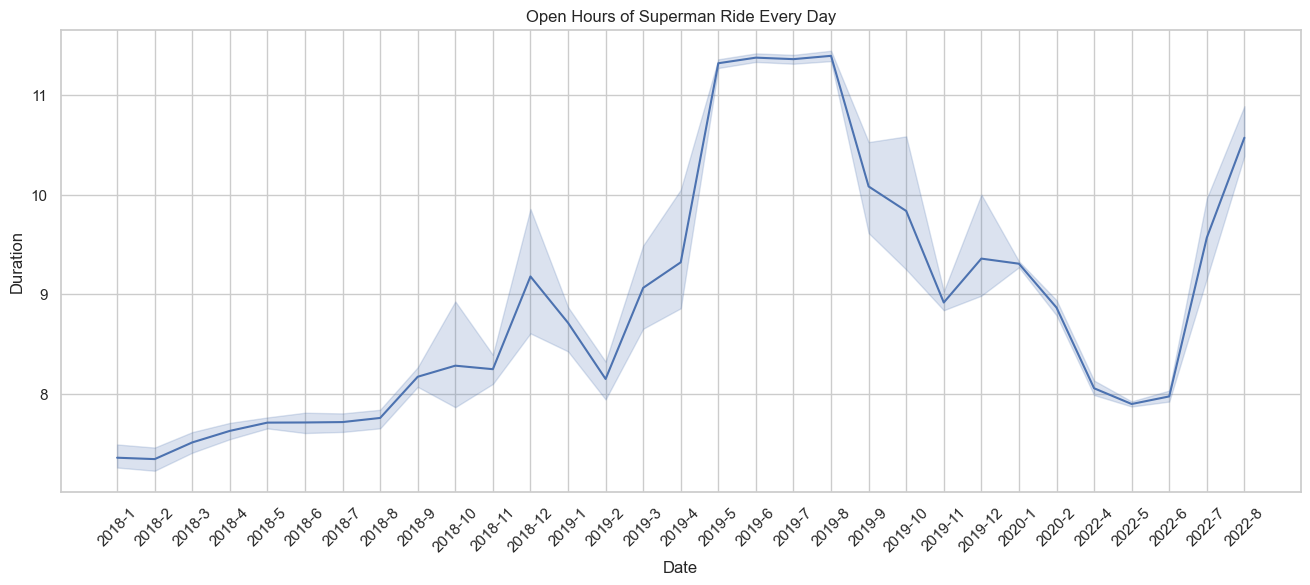

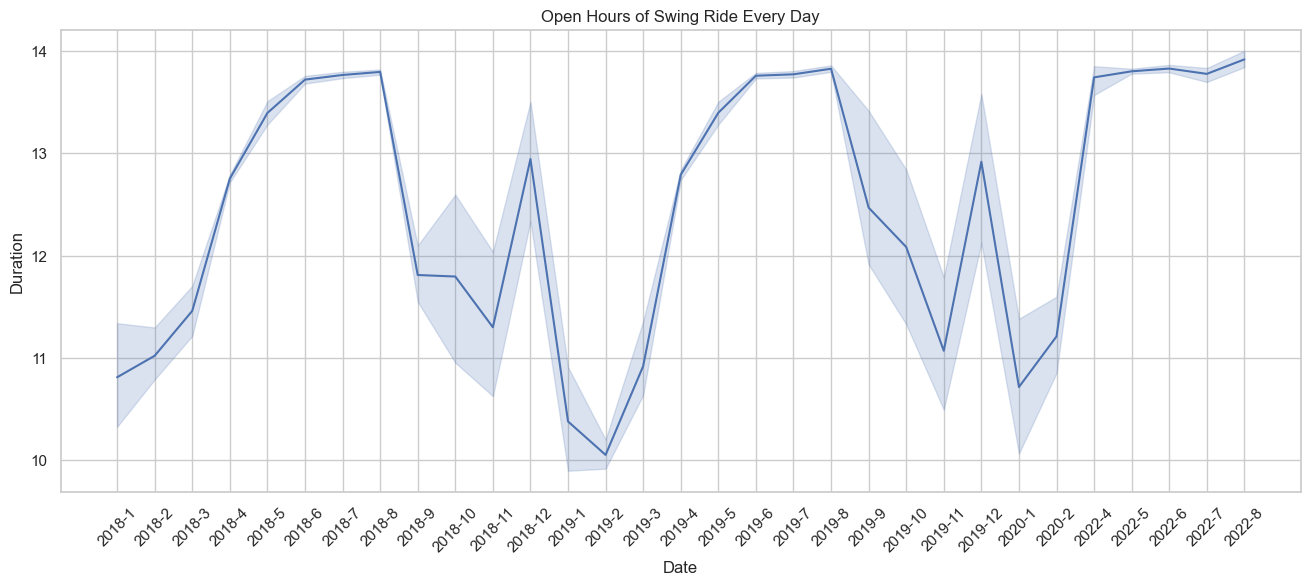

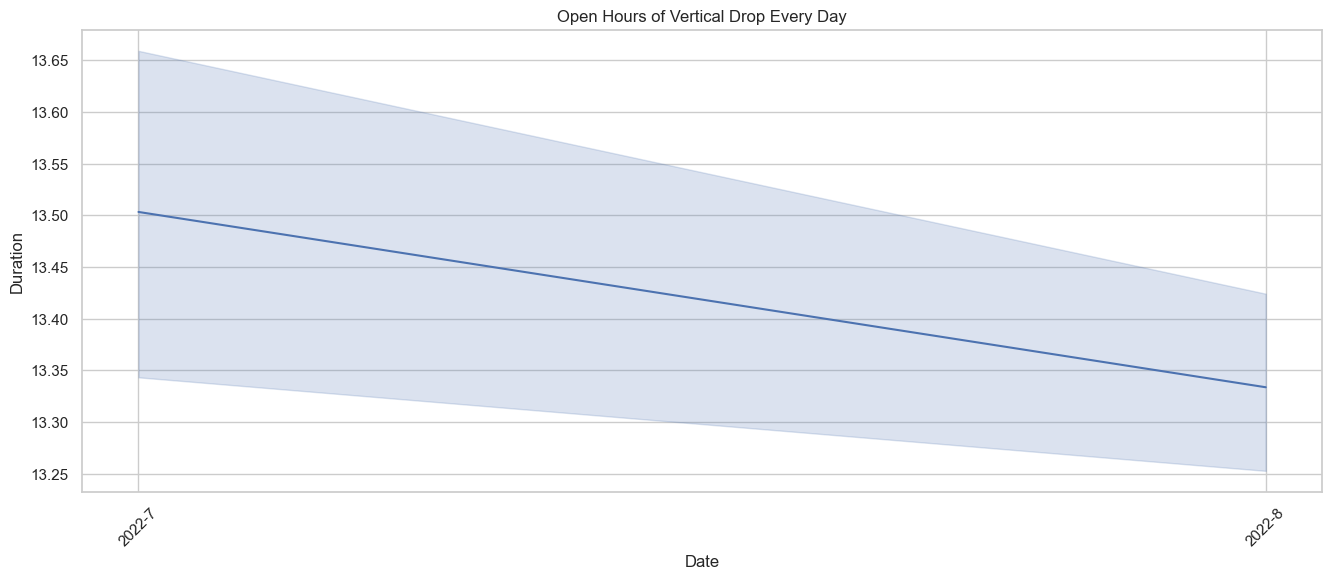

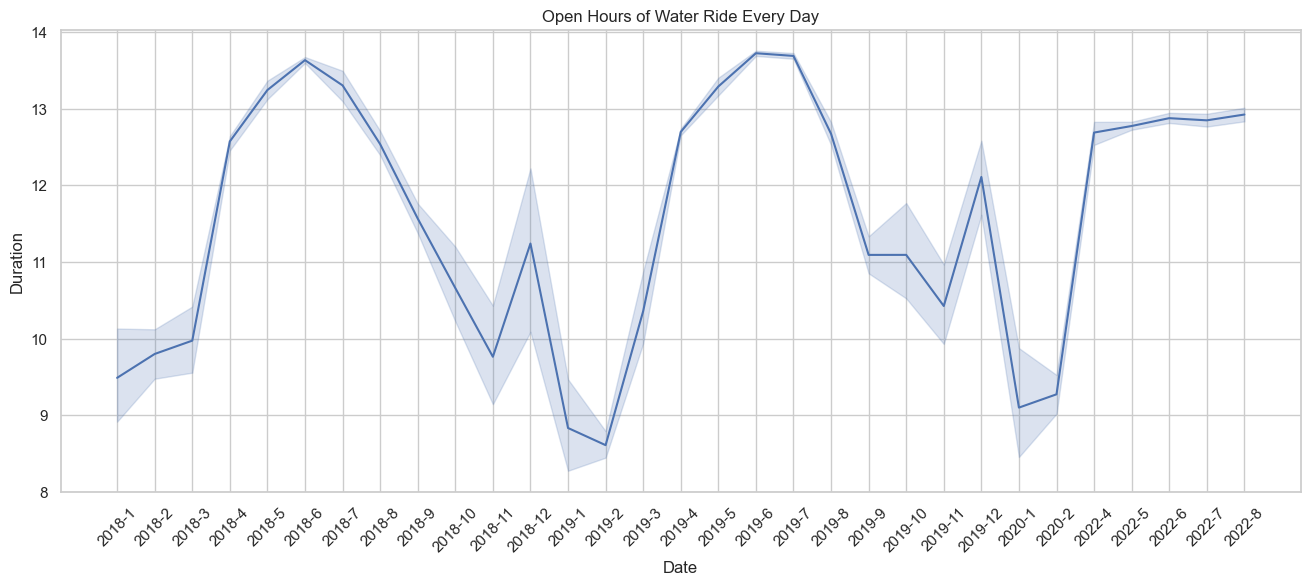

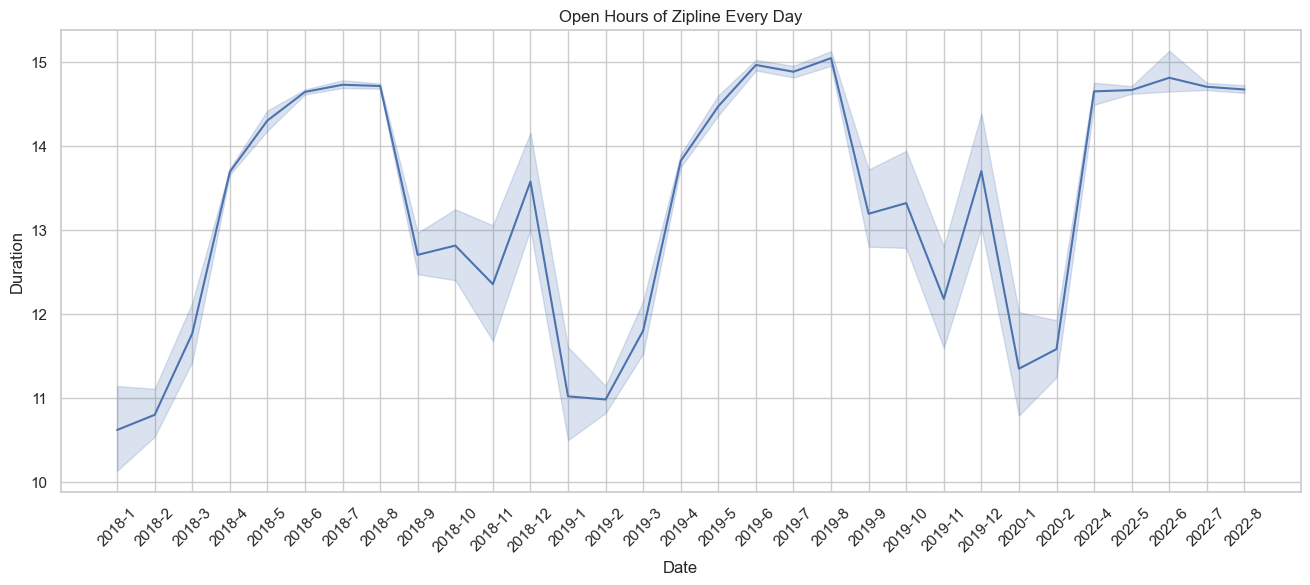

In [18]:
for attraction in attr_PA:
    temp = attr[attr['ENTITY_DESCRIPTION_SHORT'] == attraction]
    temp = temp.sort_values(by = ['Year', 'Month'])
    temp['X'] = temp['Year'].astype(str) + '-' + temp['Month'].astype(str)

    plt.figure(figsize=(16, 6))
    sns.lineplot(x='X', y='duration_hour', data=temp, linestyle='-')
    plt.title('Open Hours of ' + attraction + ' Every Day')
    plt.xlabel('Date')
    plt.ylabel('Duration')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [20]:
weather['dt'] = pd.to_datetime(weather['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')
weather['Year'] = weather['dt'].dt.year
weather['Month'] = weather['dt'].dt.month
weather['Day'] = weather['dt'].dt.day

In [21]:
weather['weather_main'].unique()

array(['Clear', 'Clouds', 'Rain', 'Snow'], dtype=object)

In [22]:
weather['weather_description'].unique()

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain', 'light snow',
       'snow', 'heavy intensity rain'], dtype=object)

In [23]:
weather_main = weather[['Year', 'Month', 'Day', 'weather_main', 'weather_description']]
weather_main = weather_main[weather_main.Year >= 2018]

In [24]:
weather_2018 = weather_main[weather_main.Year == 2018].copy()
weather_2018 = weather_2018.groupby(['Year', 'Month', 'Day'])['weather_main'].agg(lambda x: x.mode().iloc[0]).reset_index()
weather_2018['X'] = weather_2018['Month'].astype(str) + '-' + weather_2018['Day'].astype(str)
weather_2018

Year  Month  Day weather_main      X
0    2018      1    1       Clouds    1-1
1    2018      1    2       Clouds    1-2
2    2018      1    3         Rain    1-3
3    2018      1    4         Rain    1-4
4    2018      1    5       Clouds    1-5
..    ...    ...  ...          ...    ...
360  2018     12   27       Clouds  12-27
361  2018     12   28       Clouds  12-28
362  2018     12   29       Clouds  12-29
363  2018     12   30       Clouds  12-30
364  2018     12   31       Clouds  12-31

[365 rows x 5 columns]

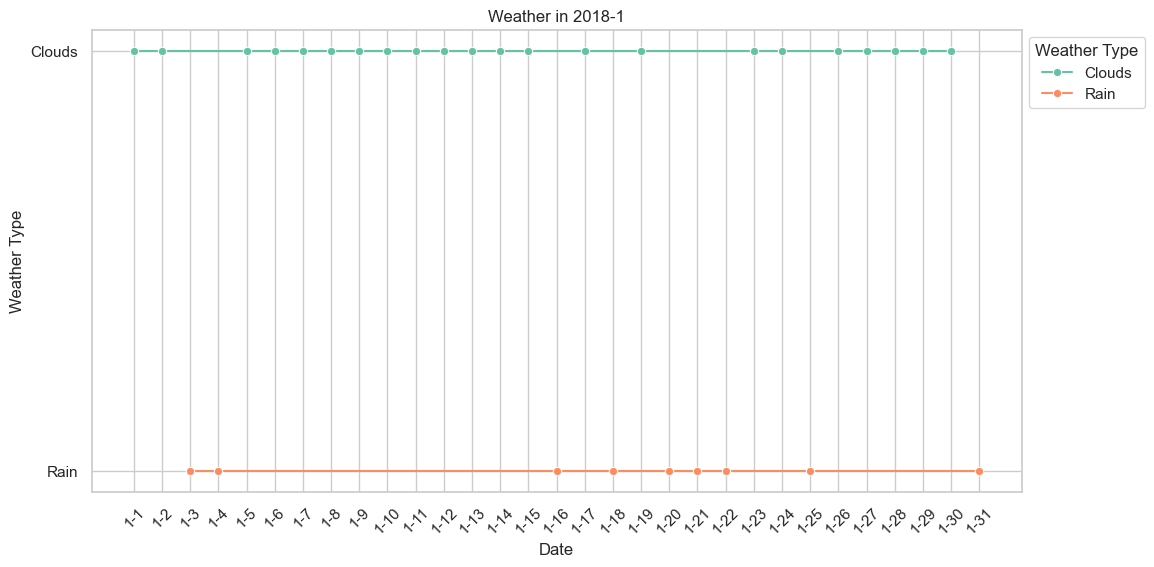

In [25]:
weather_2018_1 = weather_2018[weather_2018['Month'] == 1].copy()
plt.figure(figsize=(12, 6))
sns.lineplot(x='X', y='weather_main', data=weather_2018_1, hue='weather_main', palette='Set2', marker='o')
plt.title('Weather in 2018-1')
plt.xlabel('Date')
plt.ylabel('Weather Type')
plt.xticks(rotation=45)
plt.legend(title='Weather Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

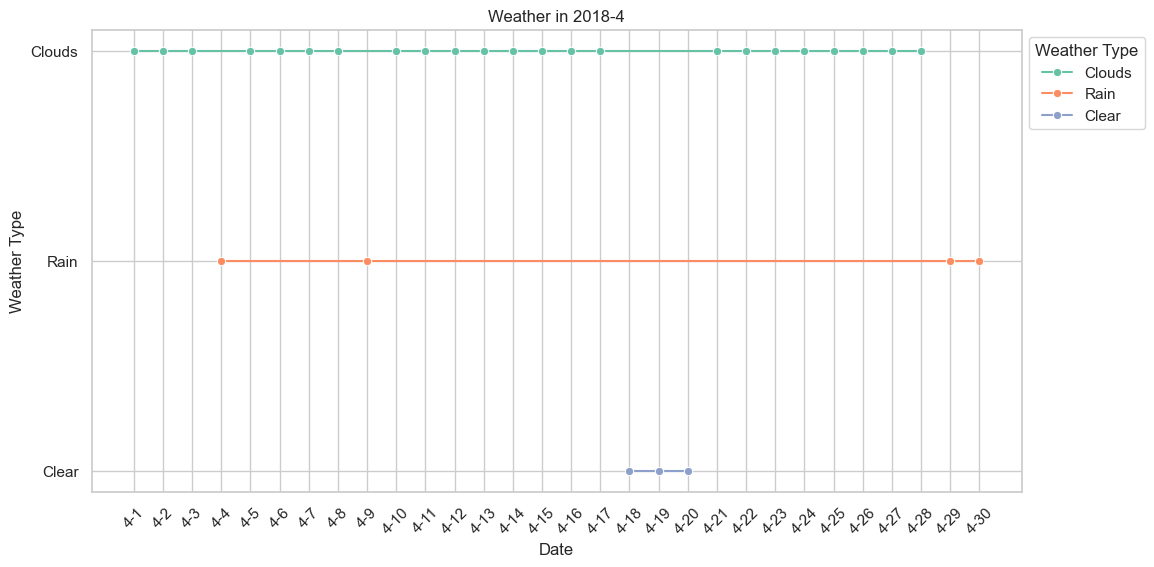

In [26]:
weather_2018_4 = weather_2018[weather_2018['Month'] == 4].copy()
plt.figure(figsize=(12, 6))
sns.lineplot(x='X', y='weather_main', data=weather_2018_4, hue='weather_main', palette='Set2', marker='o')
plt.title('Weather in 2018-4')
plt.xlabel('Date')
plt.ylabel('Weather Type')
plt.xticks(rotation=45)
plt.legend(title='Weather Type', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()